# Understanding the Distribution of Crime In Metro Vancouver

In [1]:
crime_data <- read.csv("crimedata.csv")

In [16]:
library(tidyverse)
library(ggplot2)
library(repr)
library(infer)

# Background

Metro Vancouver has one of the highest global crime index ratings in all of Canada, putting it above other major metropolises like Toronto and Montreal. This may come as a surprise to some, though Vancouver did not reach the top 100 worst cities in the world (ranking based on the global crime index), with a crime score of 37.16, and safety rating of 62.84, it was still ranked within the top 300 highest crime cities. Even more concerning, during the pandemic, hate crime rates shot up a staggering 21% across all of British Columbia. Given this information, it is of paramount importance to invest time and resources into mitigating and reducing crime (through education and intervention) so that we can all live in a safer and more productive society.


# Introduction

This project analyzes Vancouver crime data, sourced from the PRIME BC Police Records Management System with the intention of enhancing community awareness on policing activities and frequencies of crimes committed in Metro Vancouver. Since the data set contains information on a plethora of crime categories, we have decided to concentrate on one specific category “Theft from Vehicle”, to perform our larger analysis (our hypothesis test), while performing minor analysis/comparisons on other categories of crimes. And so, for our hypothesis, we are going to compare the proportion of “Theft from Vehicle” crimes occurring in two distinct neighborhoods, “West End” and “Central Business District”. These specific locations were chosen due to high population density and visitation rates, and we are predicting that there will be no difference in crime rates between the two locations. The goal of this analysis is to identify if there is a difference between crime rates in the defined locations, which could lead to further investigations why there is/isn’t a difference.


#### The dataset contains the following variables:

**Type** - The type of crime that was commited such as Break and Enter, Homicide, Mischeif etc.Please note that The broad category of 'Offence Against a Person' includes all violent incidents (e.g., robbery, assault, sexual assault, domestic assault), with the exception of 'Assaults Against Police' and The 'Other Theft' category includes a range of property related incidents such as shoplifting, theft of personal property (over / under $5000), mail theft, and utilities theft.

**Time** - The time at which the crime was committed, it is represented by  hours and minutes in the dataset.

**Date** - The date at which the crime was committed, it is represented by the year, month and day column in the dataset. 

For the location and scale parameters we are trying to find the mean and standard deviation of the time at which the majority of crimes are committed respectively. As for the confidence interval, we will compare the mean of the time that the crime occured at the two specified neighborhoods. In order to do so we used bootstrapping to compare the mean of the time of crime.Furthermore, in order to ensure our analysis is representative of present day crime rates, we have decided to conduct our analysis to contain data from the past 5 years (2018-2022).


**Since the data set has 831320 rows in total, it is too big for us to analyze, so we decide to only focus on the last five years (35979 rows in total).**


In [3]:
crime_data <- crime_data %>%
    filter(YEAR == c("2022","2021","2020","2019","2018"))
head(crime_data)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Break and Enter Commercial,2021,11,21,6,33,10XX ALBERNI ST,West End,491015.9,5459166
2,Break and Enter Commercial,2022,3,19,6,42,10XX ALBERNI ST,West End,491102.2,5459092
3,Break and Enter Commercial,2022,4,30,22,45,10XX BALFOUR AVE,Shaughnessy,490699.8,5455444
4,Break and Enter Commercial,2018,4,9,6,0,10XX BEACH AVE,Central Business District,490249.2,5458167
5,Break and Enter Commercial,2020,4,1,3,25,10XX BEACH AVE,Central Business District,490252.4,5458163
6,Break and Enter Commercial,2021,6,15,4,0,10XX BEACH AVE,Central Business District,490258.4,5458155


(Table 1)

In [4]:
num_total <- nrow(crime_data)

num_BEC <- crime_data %>%
    filter(TYPE == "Break and Enter Commercial") %>%
    nrow()
num_BER <- crime_data %>%
    filter(TYPE == "Break and Enter Residential/Other") %>%
    nrow()
num_M <- crime_data %>%
    filter(TYPE == "Mischief") %>%
    nrow()
num_OAP <- crime_data %>%
    filter(TYPE == "Offence Against a Person") %>%
    nrow()
num_OT <- crime_data %>%
    filter(TYPE == "Other Theft") %>%
    nrow()
num_TfV <- crime_data %>%
    filter(TYPE == "Theft from Vehicle") %>%
    nrow()
num_ToV <- crime_data %>%
    filter(TYPE == "Theft of Vehicle") %>%
    nrow()
num_ToB <- crime_data %>%
    filter(TYPE == "Theft of Bicycle") %>%
    nrow()
num_VCPS <- crime_data %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)") %>%
    nrow()

#num_total = 35979

#num_BEC = 2070
#num_BER = 1767
#num_M = 5204
#num_OAP = 3258
#num_OT = 9262
#num_TfV = 10815
#num_ToV = 952
#num_ToB = 1645
#num_VCPS = 984


In above code, we calculate the number of each type of crime.

We can select the top three crime types in terms of number, and we will use the related data in later analysis.

`Theft from Vehicle:  10815`

`Other Theft: 9262`

`Mischief: 5204`






We will only focus on these variables: **type, year, month, hour** and **neighbourhood**.

In [5]:
crime_data <- crime_data %>%
    select(TYPE, YEAR, MONTH, HOUR, NEIGHBOURHOOD)
head(crime_data)

,TYPE,YEAR,MONTH,HOUR,NEIGHBOURHOOD
,<chr>,<int>,<int>,<int>,<chr>
1,Break and Enter Commercial,2021,11,6,West End
2,Break and Enter Commercial,2022,3,6,West End
3,Break and Enter Commercial,2022,4,22,Shaughnessy
4,Break and Enter Commercial,2018,4,6,Central Business District
5,Break and Enter Commercial,2020,4,3,Central Business District
6,Break and Enter Commercial,2021,6,4,Central Business District


(Table 2)

We want to visualize the percentage of various crime types in the last five years, so we create a pie chart using the code below.

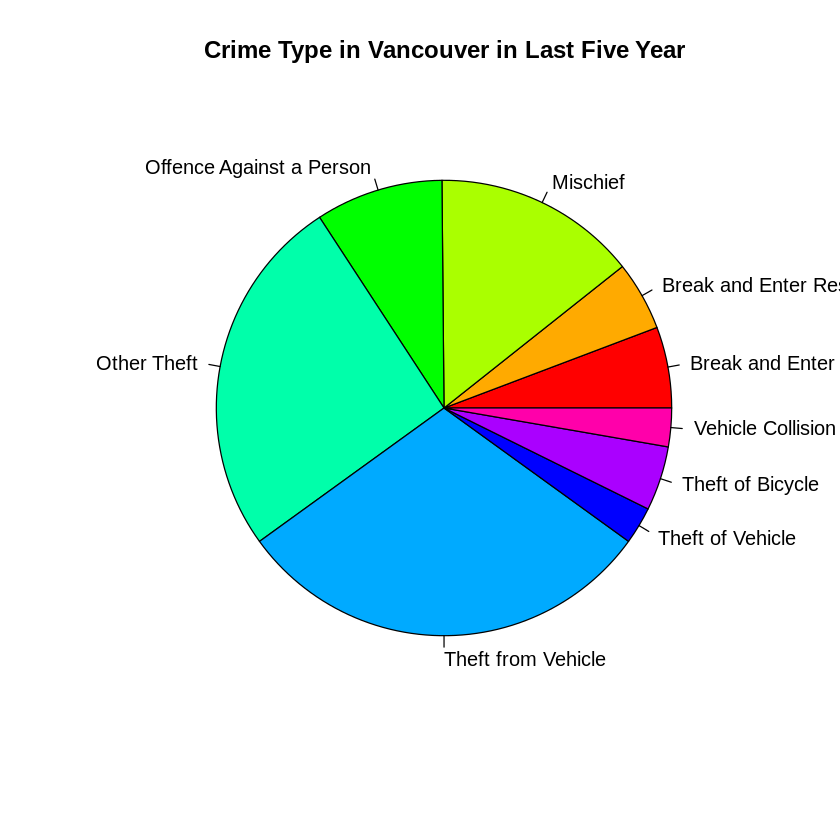

In [6]:
# Create data for the graph.
x <- c(num_BEC, num_BER, num_M, num_OAP, num_OT, num_TfV, num_ToV, num_ToB, num_VCPS)
labels <- c("Break and Enter Commercial", "Break and Enter Residential/Other", 
            "Mischief", "Offence Against a Person", "Other Theft",
           "Theft from Vehicle", "Theft of Vehicle", "Theft of Bicycle",
           "Vehicle Collision or Pedestrian Struck (with Injury)")

# Plot the chart with title and rainbow color pallet.
pie(x, labels, main = "Crime Type in Vancouver in Last Five Year", col = rainbow(length(x)))


(Figure 1)

From above graph we can find that **"Theft from Vehicle"** and **"Other theft"** account for the most dominant proportion, with the sum of the two exceeding half of all crime types. This is followed by **"Mischief"** and **"Offence Against a Person"**, which follow closely. The remaining five crime types account for less than a quarter of the total.

In [7]:
# see the most frequent time and place that each crime type happen
freq1 <- table(crime_data$TYPE, crime_data$HOUR)

table1 <- as.data.frame(matrix(freq1[1:length(freq1)],nrow = length(row.names(freq1)), ncol = length(colnames(freq1))))
row.names(table1) <- row.names(freq1)
colnames(table1) <- colnames(freq1)

table1

,0,1,2,3,4,5,6,7,8,9,⋯,14,15,16,17,18,19,20,21,22,23
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Break and Enter Commercial,156,108,114,162,175,145,100,73,67,72,⋯,47,67,61,63,80,61,57,75,74,75
Break and Enter Residential/Other,134,49,50,49,35,43,49,62,77,81,⋯,57,77,79,89,93,81,85,86,99,76
Homicide,11,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Mischief,396,207,193,145,123,124,121,125,166,217,⋯,173,188,255,299,338,253,296,268,306,279
Offence Against a Person,3258,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Other Theft,397,144,121,102,94,93,93,170,286,371,⋯,651,663,678,682,624,531,490,334,259,223
Theft from Vehicle,817,278,213,177,162,183,190,227,328,320,⋯,351,441,516,693,855,758,750,729,785,613
Theft of Bicycle,148,41,13,15,17,18,36,46,73,65,⋯,85,92,83,99,118,108,99,84,68,61
Theft of Vehicle,80,26,14,16,24,19,16,24,29,28,⋯,32,35,43,68,66,67,63,69,68,37


(Table 3)

From above table, we can see the number of occurrences of each crime type at different times during the last five years. But this table has too many rows and columns, and there are also some types of crime types that are distributed very extreme for our analysis. 

Therefore, we decided to pick the **three** most frequent crime types to explore **the time periods when crime occurs most often**.

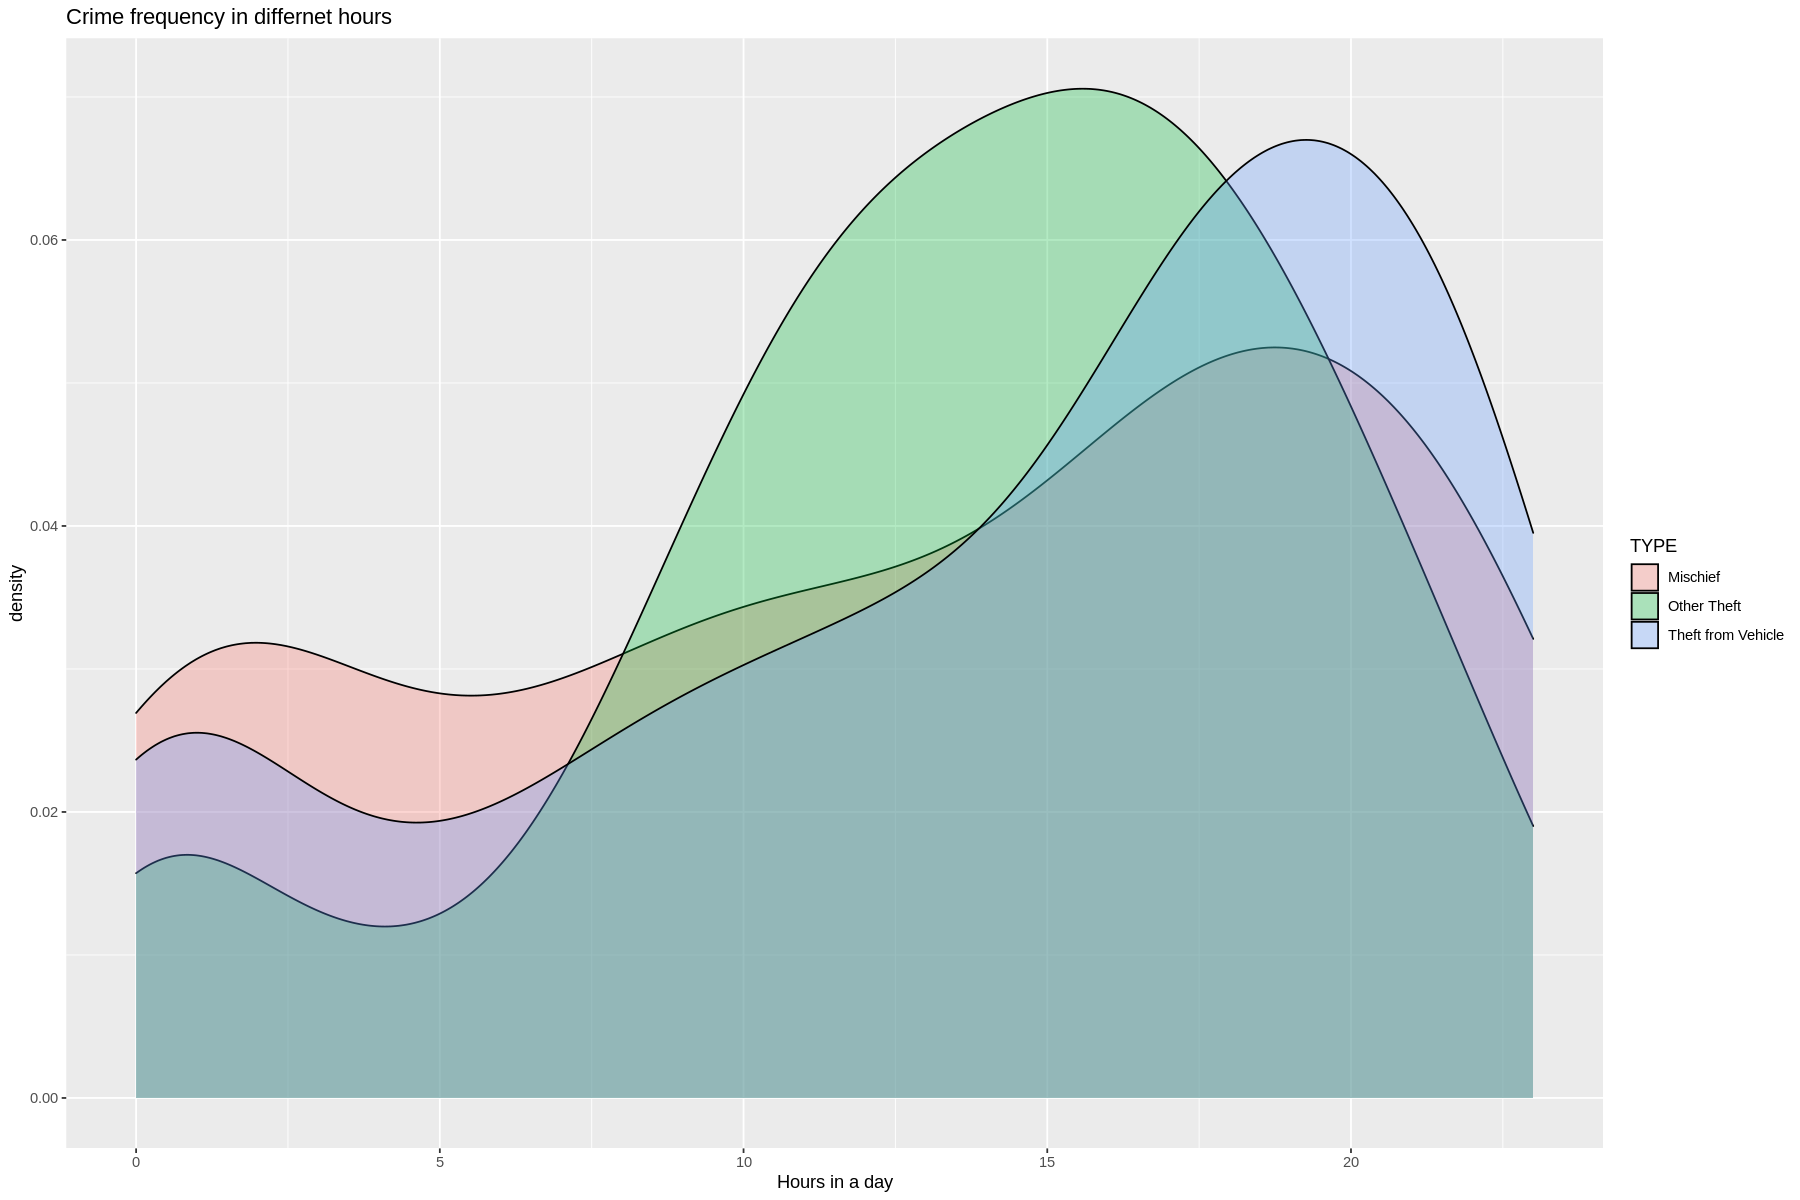

In [8]:
options(repr.plot.width = 15, repr.plot.height = 10)

# only focus on top three frequent crime type
crime_top3 <- crime_data %>%
    filter(TYPE == "Theft from Vehicle" | 
           TYPE == "Other Theft" |
           TYPE == "Mischief") %>%
    ggplot(aes(x=HOUR, group=TYPE, fill=TYPE)) +
    geom_density(adjust=2, alpha=.3) +
    labs(x = "Hours in a day") +
    ggtitle("Crime frequency in differnet hours")


crime_top3


(Figure 2)

It's a clear and nice plot! We can find that "mischief" and "theft from vehicle" mostly happen in the evening (about 18 p.m.) while "other theft" may happen in the afternoon (about 15 p.m.). They are all **during the day**!

Well... What will happen if we add the **forth** frequent crime type into the plot?

Let's try the code below!

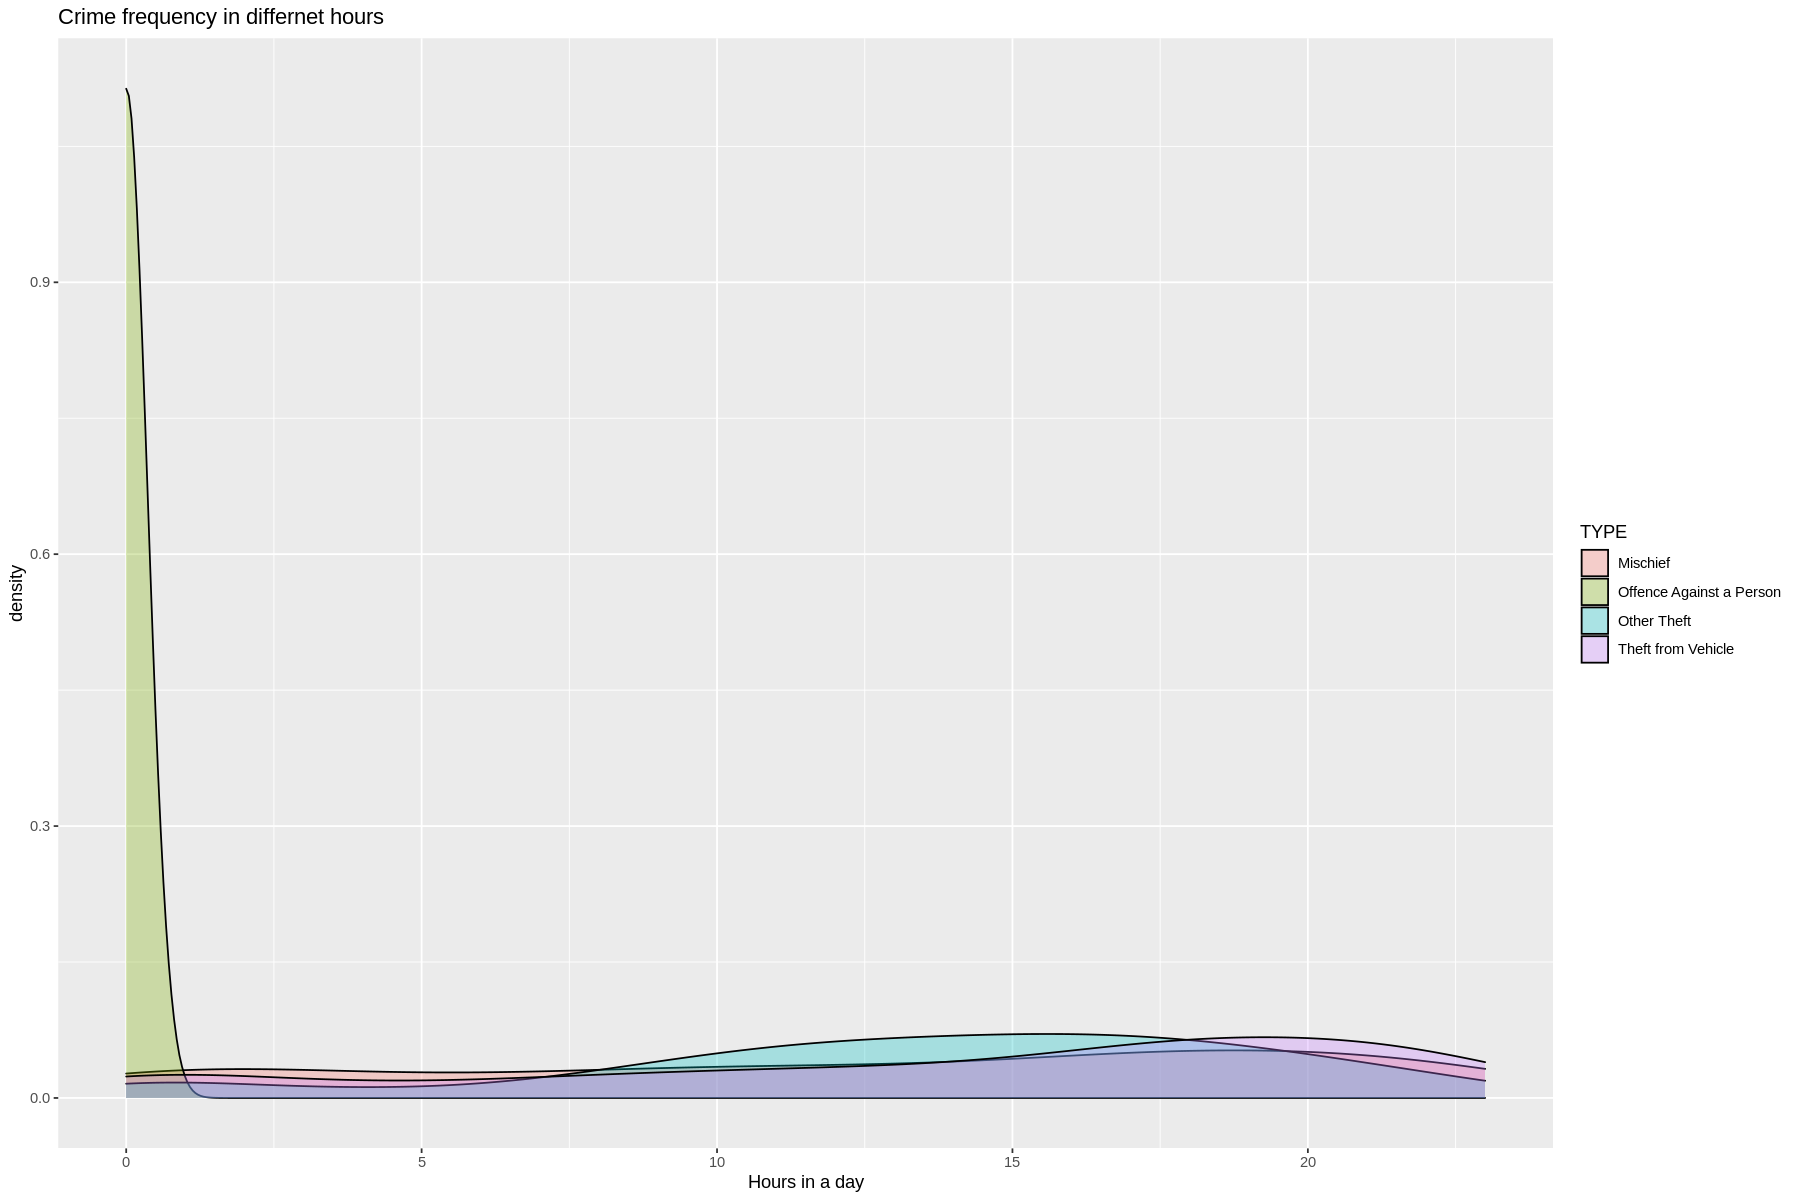

In [9]:
crime_top4 <- crime_data %>%
    filter(TYPE == "Theft from Vehicle" | 
           TYPE == "Other Theft" |
           TYPE == "Mischief" |
           TYPE == "Offence Against a Person") %>%
    ggplot(aes(x=HOUR, group=TYPE, fill=TYPE)) +
    geom_density(adjust=2, alpha=.3) +
    labs(x = "Hours in a day") +
    ggtitle("Crime frequency in differnet hours")


crime_top4

(Figure 3)

Ooooof! The plot has changed dramatically! What happens?

That is because almost all the "offence against a person" crimes happen at about 0 o'clock at **night**.

As the **U.S.News** says, most crimes committed in big cities occur during the day, while **more violent offenses** happen more frequently at night. We can prove it through our graph that different crime tyoes happen in different times.

In [10]:
# find the amount of crime type "Theft from Vehicle" in each neighbourhood
crime_data %>%
    filter(TYPE == "Theft from Vehicle") %>%
    group_by(NEIGHBOURHOOD) %>%
    summarise(n = n())

NEIGHBOURHOOD,n
<chr>,<int>
Arbutus Ridge,90
Central Business District,3556
Dunbar-Southlands,120
Fairview,554
Grandview-Woodland,490
Hastings-Sunrise,475
Kensington-Cedar Cottage,452
Kerrisdale,133
Killarney,182


(Table 4)

For our hypothesis test, we wish to compare the proportion of the fixed one type crime **"Theft from Vehicle"** occurring in the two different neighborhoods **"West End"** and **"Central Business District"**.

In [11]:
# calculate the amount of total crimes in two neighbourhoods
num <- crime_data %>%
    filter(NEIGHBOURHOOD == "West End" | NEIGHBOURHOOD == "Central Business District") %>%
    select(TYPE, NEIGHBOURHOOD) %>%
    group_by(NEIGHBOURHOOD) %>%
    summarise(n = n())

# calculate the amount of total crimes in each neighbourhood
num_CBD <- num$n[1] #11046
num_WE <- num$n[2] #3142

# tidy the data frame for needed type and neighbourhood
crime_TN <- crime_data %>%
    filter(TYPE == "Theft from Vehicle") %>%
    filter(NEIGHBOURHOOD == "West End" | NEIGHBOURHOOD == "Central Business District") 

head(crime_TN)

,TYPE,YEAR,MONTH,HOUR,NEIGHBOURHOOD
,<chr>,<int>,<int>,<int>,<chr>
1,Theft from Vehicle,2018,8,11,Central Business District
2,Theft from Vehicle,2020,12,18,West End
3,Theft from Vehicle,2021,2,17,West End
4,Theft from Vehicle,2018,12,17,West End
5,Theft from Vehicle,2022,1,19,West End
6,Theft from Vehicle,2018,3,4,West End


(Table 5)

#### Method 1: Asymptotics

In [12]:
# calculate the anoumt of crime type "Theft from Vehicle" in each neighbourhood
crime_hypothesis_n <- crime_TN %>%
    group_by(NEIGHBOURHOOD) %>%
    summarise(n = n())

#crime_hypothesis_n$n[1]
#crime_hypothesis_n$n[2] --- To find the amounts

crime_hypothesis <- crime_hypothesis_n %>%
    mutate(prop = c(3556/11046, 989/3142))

crime_hypothesis

NEIGHBOURHOOD,n,prop
<chr>,<int>,<dbl>
Central Business District,3556,0.3219265
West End,989,0.3147677


(Table 6)

Cool! We can find that the proportions of crime type "Theft from Vehicle" in two neighbourhoods are very similar!

Let's make a hypothesis test now! 

(*Note: p1 for porprotion in "Central Business District", while p2 for porprotion in "West End".*)

H0: The neighborhoods "West End" and "Central Business District" have the same prop of "Theft from Vehicle" crime. (p1 = p2)

H1: The neighborhoods "West End" and "Central Business District" have different prop of "Theft from Vehicle" crime. (p1 != p2) 



In [13]:
# Confidence Intervals: Difference in proportions
p1 <- crime_hypothesis$prop[1]
p2 <- crime_hypothesis$prop[2]
n1 <- crime_hypothesis$n[1]
n2 <- crime_hypothesis$n[2]
p_hat <- (n1*p1 + n2*p2)/(n1+n2) #0.3203687
se <- sqrt(p_hat*(1-p_hat)*(1/n1 + 1/n2)) #0.0167745
z <- (p1 - p2)/se
z

[1] 0.4267683

We can find that z-value is euqal to **0.4267687**. The let's calculate the confidence interval!

In [14]:
p_value <- 2 * pnorm(z, lower.tail=FALSE)
p_value

[1] 0.6695481

WOW! We can see that the p-value is **0.669548**, which is greater than 0.05. A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected. 

Therefore we are 95% confident that the neighborhoods "West End" and "Central Business District" have the same prop of "Theft from Vehicle" crime.

#### Method 2: Bootstrapping

In [36]:
set.seed(123)

bootstrap_dist <- 
    crime_data %>% 
    rep_sample_n(reps = 1000, size = 10, replace = T) %>% 
    filter(TYPE == "Theft from Vehicle") %>%
    filter(NEIGHBOURHOOD == "West End" | NEIGHBOURHOOD == "Central Business District") %>%
    group_by(replicate, TYPE, NEIGHBOURHOOD) %>% 
    summarise(n = n(),
              p = n / 10) %>% 
    select(TYPE, NEIGHBOURHOOD, n, p)

bootstrap_dist1 <- bootstrap_dist %>%
    group_by(NEIGHBOURHOOD) %>%
    summarise(n_sum = sum(n), mean_p = mean(p))
bootstrap_dist1

P1 <- bootstrap_dist1$mean_p[1]
P2 <- bootstrap_dist1$mean_p[2]
N1 <- bootstrap_dist1$n_sum[1]
N2 <- bootstrap_dist1$n_sum[2]
P_hat <- (N1*P1 + N2*P2)/(N1+N2)
SE <- sqrt(P_hat*(1-P_hat)*(1/N1 + 1/N2))
Z <- (P1 - P2)/SE
Z

p_value <- 2 * pnorm(Z, lower.tail=FALSE)
p_value

`summarise()` has grouped output by 'replicate', 'TYPE'. You can override using
the `.groups` argument.
Adding missing grouping variables: `replicate`


NEIGHBOURHOOD,n_sum,mean_p
<chr>,<int>,<dbl>
Central Business District,973,0.1510870
West End,270,0.1144068


[1] 1.522736

[1] 0.1278247

We can find that z-value is **1.5227**, which is bigger than what we calculated by asymptotics. And the p-value is **0.12782**, which is also bigger than 0.05. The null hypothesis is not rejected. Therefore we are 95% confident that the neighborhoods "West End" and "Central Business District" have the same prop of "Theft from Vehicle" crime.

# Methods and Results


#### Describe in written English the methods you used to perform your analysis from beginning to end that narrates the code that does the analysis.


Using hypothesis testing we found out at which location between **West End** and **Central Business District** did **Theft from Vehicle** had the highest frequency. The choice of the two specific neighborhoods was made in accordance to the fact that they have the largest amount of crime times.


To give the readers better understanding of the data frame the different types of crime types have been visualized in the form of a **pie-chart** (Figure 1). The frequency of crimes occurring at different time intervals over the last 5 year have been summarized in a **count table** (Table 3). The top 3 and 4 crimes have then been visualized in Figure 2 and Figure 3 respectively. As per our result -- most crimes committed in big cities occur during the day, while more violent offenses happen more frequently at night (Figure 2 and Figure 3) is similar to what the U.S.News reported.


**Stephanie Glen** suggests that hypothesis testing in statistics is a way for you to test the results of a survey or experiment to see if you have meaningful results. After we organize all the data we need to use, we can do the hypothesis testing (Table 6). And we found that, we are **95% confident** that the neighborhoods **"West End"** and **"Central Business District"** have the same proportion of **"Theft from Vehicle"** crime, which means that the frequencies of the same type of crime in different neighborhoods are similar.


As a warning, people should increase the awareness of precautions and do not leave valuables in the conspicuous places in the car.




#### Do you think one of bootstrapping or asymptotics is more appropriate than the other? Why or why not? Explain why you think both methods gave you similar/different results, and whether you think one is more trustworthy than the other.

**Asymptotics** is better, although in both two methods we do not reject the hypothesis, the p-value calculated from asymptotics is more stable. As we increase the size in bootstrapping, the p-value gets smaller even below the 0.05 confidence level. Our data has so many types and neighborhoods that for each neighborhood the amounts have a significant difference, so it's hard to decide a suitable sample size for bootstrapping.




# Discussion: 

The goal of our hypothesis tests, and the thesis in which we were testing for, was to identify if there was a  difference between “Theft from Vehicle” rates in the “West End” versus the “Central Business District” of Vancouver. These hypothesis tests were conducted using two different methods, the first one relied upon the theory based approach and used confidence intervals to test for a difference of proportions (proportions based off the data), while the second test used bootstrapping to create out confidence intervals. 

Our null hypothesis is that there would be no difference in crime rates, while the alternative hypothesis is that there will be a difference in crime rates, and the test was conducted at a 5 percent significance level (alpha=5%). The observed proportion (based off data) of “Theft from Vehicle” crimes in “West End” Vancouver was 0.3147677 (n=989), and 0.3219265 (n=3556) in the “Central Business District”, from this we calculated our p-hat value (0.3203687 ), and the standard error (calculated via theory methods) of the difference between the proportions is 0.0167745. We calculated the z test statistic value to be equal to 0.4267687, from this we were able to construct a confidence interval, and calculate a p-value for it, which was p-value= 0.669548. 


Because the p-value is much larger than the significance level stated (0.669548>0.05), our findings are deemed not statistically significant, and we fail to reject the null hypothesis. 


Next, we implemented the same method for hypothesis testing (difference of proportions and confidence intervals), but this time we generated 1000 bootstrapped samples of size n=10 in order to further support the validity of our findings. This time, we calculated the z-score to be z=1.5227 and the p-value to be p-value=0.12782 - both values are significantly different from our first analysis (z=0.4267687, p-value=0.669548). We suspect that this difference is predominantly due to the difference in sample sizes between the tests (in the second method, we only used n=10, whereas the first, both groups had n>500). Outside of those differences, our p-value is still significantly greater than our significance level (0.12782>0.05), and thus we deem our test not statistically significant and we fail to reject the null hypothesis. 


So, based on both of these findings, we can conclude that there is no statistically significant difference in rates of “Theft from Vehicle” crimes between “West End” Vancouver and the “Central Business District”.These findings align with what we had initially predicted, and we speculate that this is probably due to the location's closeness in proximity (both in similar locations in Vancouver) and similar socioeconomic distribution. 


Lastly, these findings may allow individuals to get a greater sense of the crime distribution in the locations tested on, which enables people to have a greater awareness/understanding of how crime varies between different locations. Allowing them to make informed decisions on, for example, which neighborhood they may wish to move into, which neighborhood they wish to send their kid to, which neighborhood they feel comfortable parking their car in, et cetera. 


# Reference
Lantz, B. (2015). _Machine Learning with R - Second Edition._ Birmingham: Packt Publishing

_Study finds crime in big cities is more likely during the day. (n.d.)._ Retrieved July 26, 2022, from https://www.usnews.com/news/cities/articles/2019-06-12/study-finds-crime-in-big-cities-is-more-likely-during-the-day

Stephanie Glen. _"Hypothesis Testing" From StatisticsHowTo.com_: Elementary Statistics for the rest of us! https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/